<a href="https://colab.research.google.com/github/VaibhavBhusawale/-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project_(Shaloy%2C_Smriti%2C_Vaibhav).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Hypothesis for the problem:**

1. The number of bikes rented during rainfall/snowfall reduces.
2. The number of bikes rented increases during peak hours.
3. The number of bikes rented during weekends is less compared to weekdays.
4. The number of bikes rented on holidays is less compared to that of working days.
5. The number of bikes rented reduces if there is high humidity.
6. The number of bikes rented on days with high solar radiations is low.
7. The number of bikes rented on average in summer is higher compared to other seasons.

# **Data Warehousing:**

In [ ]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing data

path = '/content/drive/MyDrive/Bike sharing demand prediction - Shaloy Lewis/Copy of SeoulBikeData.csv'

df = pd.read_csv(path, encoding='iso-8859-1')

In [ ]:
# Basic inspection

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# updating the attribute names

df = df.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temp', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'})

In [ ]:
df.columns

Index(['date', 'rented_bike_count', 'hour', 'temp', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'func_day'],
      dtype='object')

In [ ]:
df.shape

(8760, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               8760 non-null   object 
 1   rented_bike_count  8760 non-null   int64  
 2   hour               8760 non-null   int64  
 3   temp               8760 non-null   float64
 4   humidity           8760 non-null   int64  
 5   wind_speed         8760 non-null   float64
 6   visibility         8760 non-null   int64  
 7   dew_point_temp     8760 non-null   float64
 8   solar_radiation    8760 non-null   float64
 9   rainfall           8760 non-null   float64
 10  snowfall           8760 non-null   float64
 11  seasons            8760 non-null   object 
 12  holiday            8760 non-null   object 
 13  func_day           8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ KB


In [ ]:
df.describe()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
df.describe().shape

(8, 10)

In [ ]:
df.isnull().sum()

date                 0
rented_bike_count    0
hour                 0
temp                 0
humidity             0
wind_speed           0
visibility           0
dew_point_temp       0
solar_radiation      0
rainfall             0
snowfall             0
seasons              0
holiday              0
func_day             0
dtype: int64

In [ ]:
df['func_day'].value_counts()

Yes    8465
No      295
Name: func_day, dtype: int64

In [ ]:
df['seasons'].value_counts()

Summer    2208
Spring    2208
Autumn    2184
Winter    2160
Name: seasons, dtype: int64

In [ ]:
df['holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: holiday, dtype: int64

## Visual Inspection:

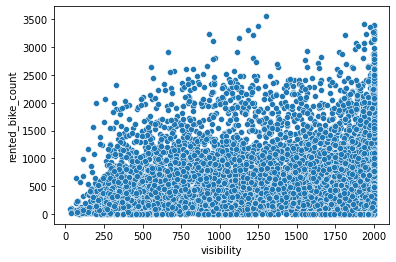

In [ ]:
sns.scatterplot(data= df, x='visibility', y='rented_bike_count')

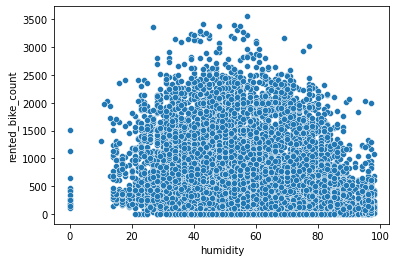

In [ ]:
sns.scatterplot(data= df, x='humidity', y='rented_bike_count')

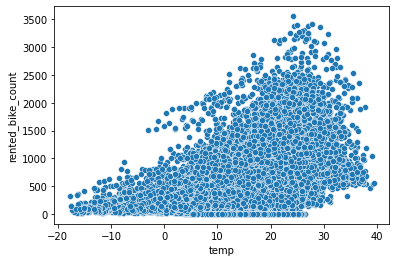

In [ ]:
sns.scatterplot(data= df, x='temp', y='rented_bike_count')

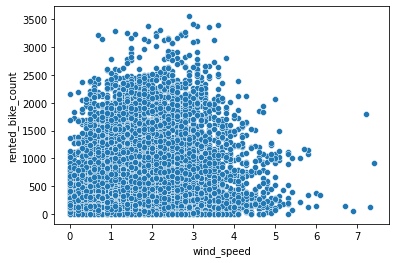

In [ ]:
sns.scatterplot(data= df, x='wind_speed', y='rented_bike_count')

# **EDA:**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


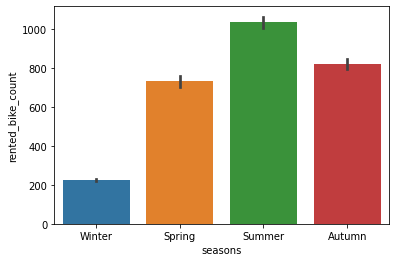

In [ ]:
sns.barplot(df["seasons"],df['rented_bike_count'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


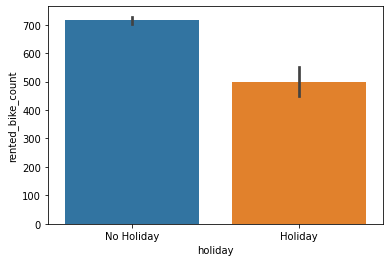

In [ ]:
sns.barplot(df["holiday"],df['rented_bike_count'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


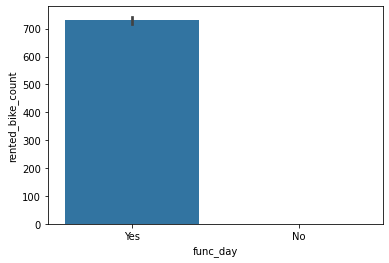

In [ ]:
sns.barplot(df["func_day"],df['rented_bike_count'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


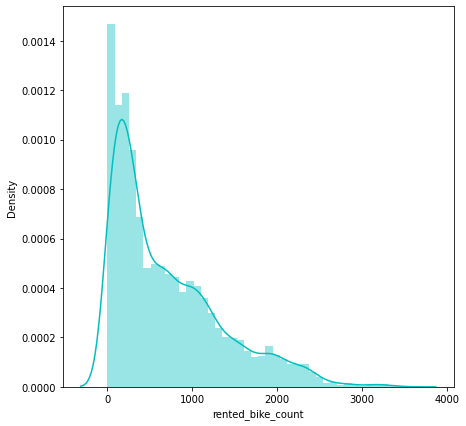

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['rented_bike_count'], color="c")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


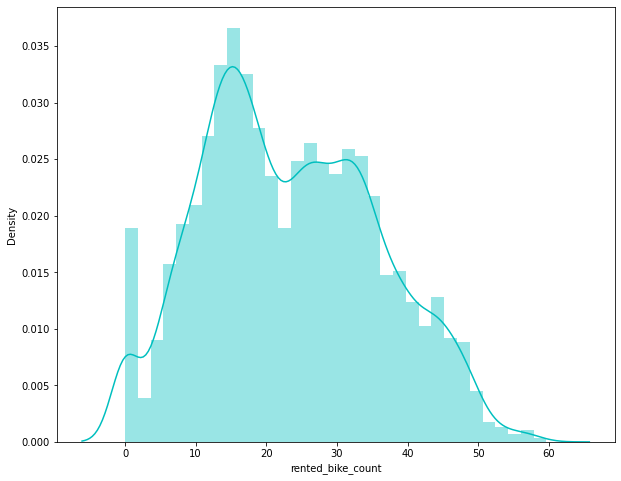

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(df['rented_bike_count']), color='c')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


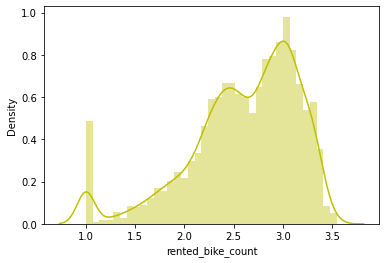

In [ ]:
sns.distplot(np.log10(df['rented_bike_count']+10),color="y")

In [ ]:
numeric_columns = ['rented_bike_count', 'hour', 'temp', 'humidity', 'wind_speed',
       'visibility', 'solar_radiation', 'rainfall', 'dew_point_temp',
       'snowfall']

In [ ]:
categorical_columns = ['holiday', 'func_day', 'seasons']

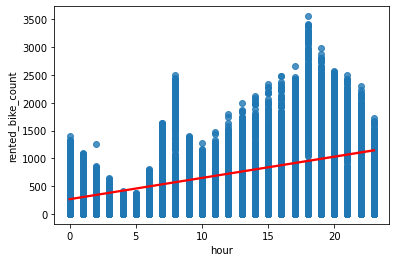

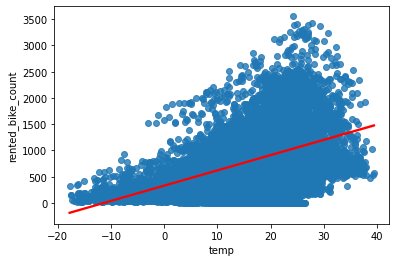

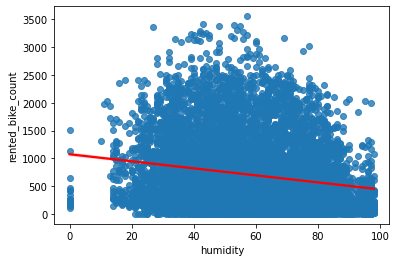

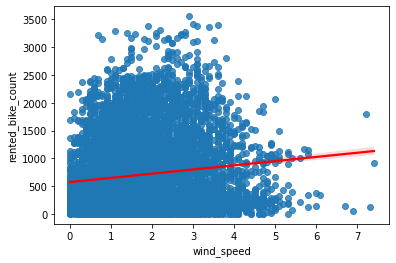

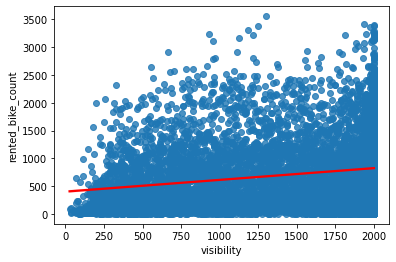

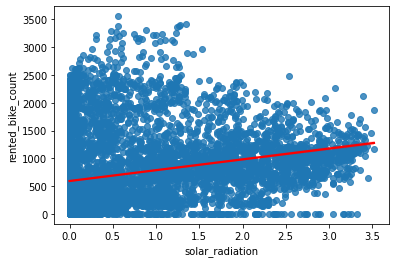

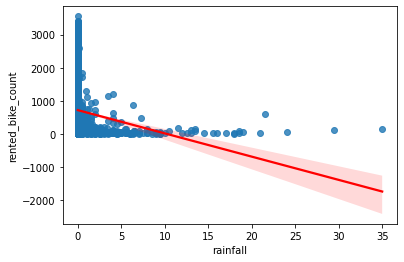

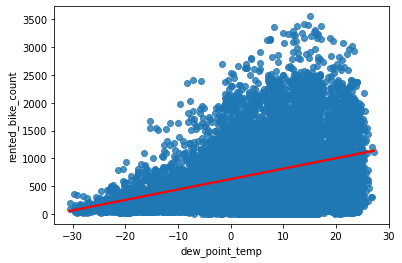

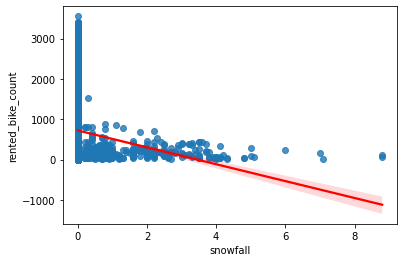

In [ ]:
for column in numeric_columns[:]:
  if column == 'rented_bike_count':
    pass
  else:
    sns.regplot(x=df[column],y=df["rented_bike_count"],line_kws={"color": "r"})
  
  plt.show()

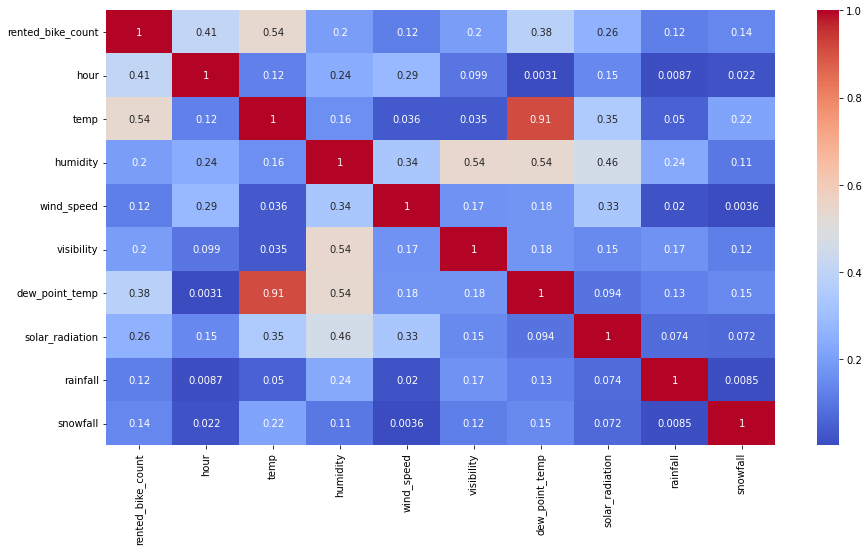

In [ ]:
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

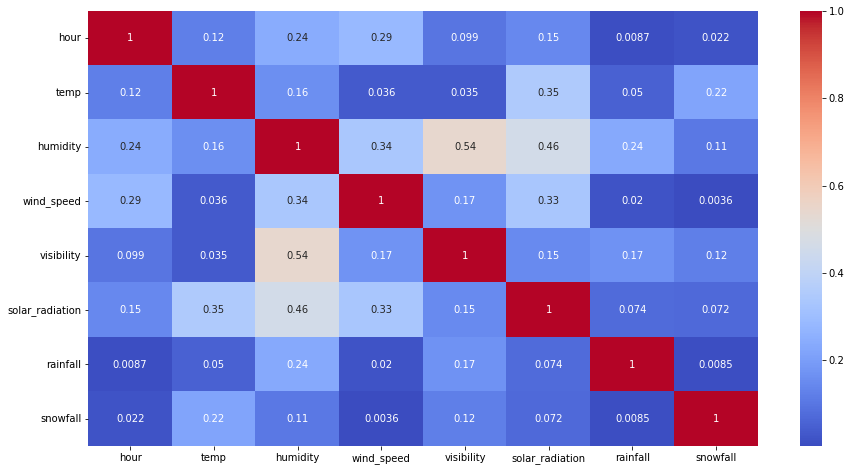

In [ ]:
plt.figure(figsize=(15,8))
correlation = independent_var.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')